In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Titanic dataset
titanic_data = pd.read_csv(r"C:\Users\yanna\Downloads\archive\Titanic-Dataset.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic_data.shape

(891, 12)

In [7]:
type(titanic_data.head)

method

In [8]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Data preprocessing for Titanic dataset
titanic_data = titanic_data.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1)




In [12]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [13]:
titanic_data = titanic_data.dropna()

In [14]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

In [16]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [17]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [18]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [19]:
# Encode 'Sex' column using LabelEncoder
labelencoder = LabelEncoder()



In [20]:

titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])


In [21]:
titanic_data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
889    0
890    0
Name: Sex, Length: 712, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

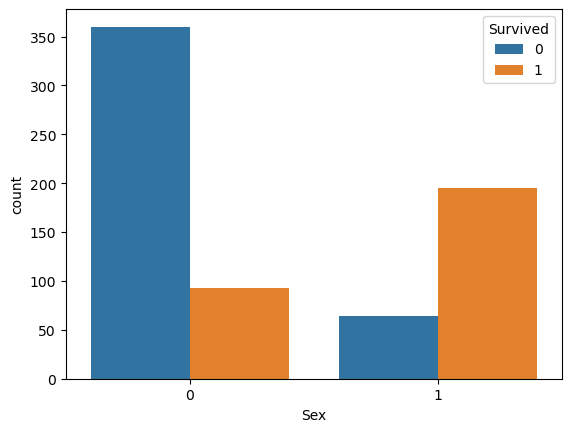

In [22]:
sns.countplot(x=titanic_data['Sex'], hue=titanic_data['Survived'])

In [23]:
titanic_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.205298
1,0.752896


In [24]:
labelencoder = LabelEncoder()

In [25]:
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])

In [26]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [27]:
titanic_data['Sex'] ,titanic_data['Survived']

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    1
 886    0
 887    1
 889    0
 890    0
 Name: Sex, Length: 712, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 712, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

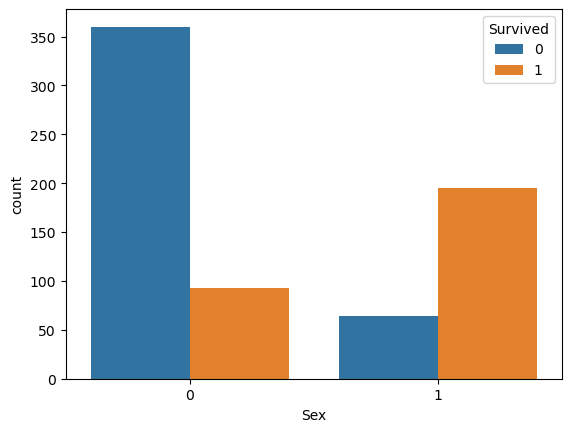

In [28]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])

In [29]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [30]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [31]:
titanic_data=titanic_data.drop(['Age'], axis=1)

In [32]:
titanic_data_final=titanic_data

In [33]:
titanic_data_final.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,True
1,1,1,1,1,0,71.2833,False,False
2,1,3,1,0,0,7.9250,False,True
3,1,1,1,1,0,53.1000,False,True
4,0,3,0,0,0,8.0500,False,True
6,0,1,0,0,0,51.8625,False,True
7,0,3,0,3,1,21.0750,False,True
8,1,3,1,0,2,11.1333,False,True
9,1,2,1,1,0,30.0708,False,False
10,1,3,1,1,1,16.7000,False,True


In [34]:
#titanic_data=titanic_data.drop(['Fare'], axis=1)

In [35]:
# Drop unnecessary columns
#titanic_data = titanic_data.drop(['Age'], axis=1)

In [36]:
# Train-test split for Titanic dataset
X_titanic = titanic_data.drop('Survived', axis=1)


In [37]:
y_titanic = titanic_data['Survived']

In [38]:
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_model = LogisticRegression(random_state=0)




In [41]:
logistic_model.fit(X_train_titanic, y_train_titanic)

C:\Users\yanna\anaconda3\annaconda new\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [42]:
y_pred_titanic_logistic = logistic_model.predict(X_test_titanic)

In [43]:
accuracy_titanic_logistic = accuracy_score(y_test_titanic, y_pred_titanic_logistic)

In [44]:
pred=print(logistic_model.predict(X_test_titanic))

[1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0]


In [45]:
print(y_train_titanic)

58     1
57     0
96     0
210    0
569    1
      ..
93     0
135    0
338    1
549    1
131    0
Name: Survived, Length: 498, dtype: int64


In [46]:
# Train Random Forest model for Titanic dataset
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)




In [47]:
random_forest_model.fit(X_train_titanic, y_train_titanic)

RandomForestClassifier(random_state=42)

In [48]:
y_pred_titanic_rf = random_forest_model.predict(X_test_titanic)

In [49]:
accuracy_titanic_rf = accuracy_score(y_test_titanic, y_pred_titanic_rf)

In [50]:
# Print results
print("Logistic Regression Model Results:")




Logistic Regression Model Results:


In [51]:
print(f'Accuracy: {accuracy_titanic_logistic:.2f}')

Accuracy: 0.74


In [52]:
print('Classification Report:')

Classification Report:


In [53]:
print(classification_report(y_test_titanic, y_pred_titanic_logistic))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       122
           1       0.72      0.66      0.69        92

    accuracy                           0.74       214
   macro avg       0.74      0.73      0.74       214
weighted avg       0.74      0.74      0.74       214



In [54]:
print("\nRandom Forest Model Results:")





Random Forest Model Results:


In [55]:
print(f'Accuracy: {accuracy_titanic_rf:.2f}')

Accuracy: 0.75


In [56]:
print('Classification Report:')

Classification Report:


In [57]:
print(classification_report(y_test_titanic, y_pred_titanic_rf))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       122
           1       0.73      0.66      0.70        92

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214

